<a href="https://colab.research.google.com/github/Nisarg03/DS-Word-Frequency-Counter/blob/main/Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
!{sys.executable} -m pip install nlp_rake

     |████████████████████████████████| 981 kB 7.9 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=862d25b2588703770101e188bb8469ccdc3130a3a870b0e51db4c59affe97b17
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [12]:
!{sys.executable} -m pip install wordcloud

In [13]:
import requests
from html.parser import HTMLParser
import nlp_rake
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
url = "https://en.wikipedia.org/wiki/Big_data"
text = requests.get(url).content.decode('utf-8')
print(text[:100])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title


In [8]:
class MyHTMLParser(HTMLParser):
  script = False
  res = ''
  def handle_starttag(self, tag, attrs):
    if tag.lower() in ['script', 'style']:
      self.script = True

  def handle_endtag(self, tag):
    if tag.lower() in ['script', 'style']:
      self.script = False

  def handle_data(self, data):
    if str.strip(data) == '' or self.script:
      return
    self.res += ' ' + data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

  Big data - Wikipedia Big data From Wikipedia, the free encyclopedia Jump to navigation Jump to search Information assets characterized by high volume, velocity, and variety This article is about large collections of data. For the band, see  Big Data (band) . For the practice of buying and selling of personal and consumer data, see  Surveillance capitalism . Growth of and digitization of global information-storage capacity [1] Big data  is a field that treats ways to analyze, systematically extract information from, or otherwise deal with  data sets  that are too large or complex to be dealt with by traditional  data-processing application software . Data with many fields (columns) offer greater  statistical power , while data with higher complexity (more attributes or columns) may lead to a higher  false discovery rate . [2]  Big data analysis challenges include  capturing data ,  data storage ,  data analysis , search,  sharing ,  transfer ,  visualization ,  querying , updating,  i

In [ ]:
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

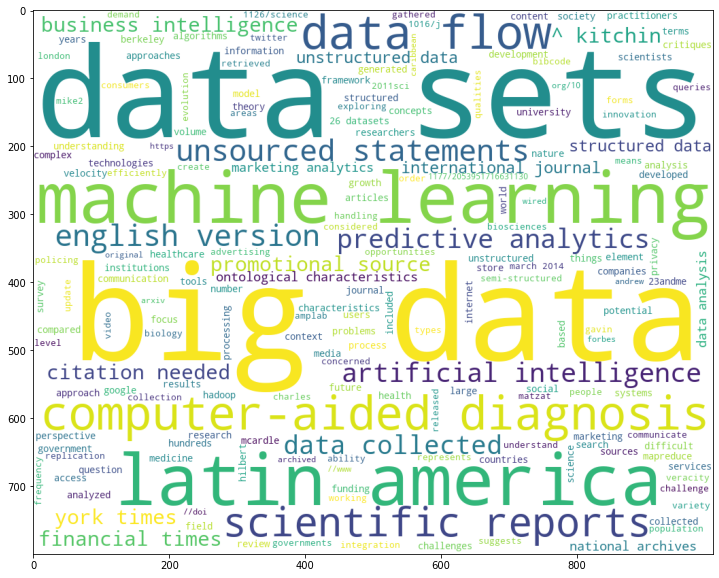

In [14]:
wc = WordCloud(background_color='white',width=1000,height=800)
plt.figure(figsize=(20,10))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))